In [122]:
import requests
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [22]:
source = 'https://statis.moi.gov.tw/micst/stmain.jsp?sys=220&ym=10201&ymt=10606&kind=21&type=1&funid=c0540801&cycle=1&outmode=0&compmode=0&outkind=1&fldlst=101&cod06=1&rdm=jZnWYqZm'

In [23]:
import pprint
import requests
from lxml import etree


def get_table_from_html(html):
    tree = etree.HTML(html)
    # 寻找所有的table标签
    table_lst = tree.xpath("//table")
    table_data_lst = []
    for table in table_lst:
        table_data_lst.append(get_table(table))

    return table_data_lst


def get_table(table_ele):
    """
    获取table数据
    :param table_ele:
    :return:
    """
    tr_lst = table_ele.xpath(".//tr")
    # 第一行通常来说都是标题
    title_data = get_title(tr_lst[0])
    # 第一行后面都是数据
    data = get_data(tr_lst[1:])

    return {
        'title': title_data,
        'data': data
    }


def get_title(tr_ele):
    """
    获取标题
    标题可能用th 标签，也可能用td标签
    :param tr_ele:
    :return:
    """
    # 先寻找th标签
    title_lst = get_tr_data_by_tag(tr_ele, 'th')
    if not title_lst:
        title_lst = get_tr_data_by_tag(tr_ele, 'td')

    return title_lst


def get_data(tr_lst):
    """
    获取数据
    :param tr_lst:
    :return:
    """
    datas = []
    for tr in tr_lst:
        tr_data = get_tr_data_by_tag(tr, 'td')
        datas.append(tr_data)

    return datas


def get_tr_data_by_tag(tr, tag):
    """
    获取一行数据
    :param tr:
    :param tag:
    :return:
    """
    datas = []
    nodes = tr.xpath(".//{tag}".format(tag=tag))
    for node in nodes:
        text = node.xpath('string(.)').strip()
        datas.append(text)

    return datas


def get_html(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36',
    }
    res = requests.get(url, headers=headers)
    res.encoding = 'big5'
    return res.text


def run():
    url = source
    # url = "https://www.phb123.com/qiye/35109.html"
    html = get_html(url)
    table_lst = get_table_from_html(html)
    #pprint.pprint(table_lst)
    return table_lst



In [24]:
if __name__ == '__main__':
    datalist=[]
    datalist = run()

In [25]:
dic = datalist[1]

In [26]:
dic

{'title': ['', '面積(坪)', '申報成交平均單價(元/坪)'],
 'data': [[],
  ['198,916', '170,919'],
  ['129,915', '163,494'],
  ['151,213', '166,553'],
  ['183,151', '167,046'],
  ['214,491', '164,866'],
  ['207,175', '170,734'],
  ['217,480', '175,512'],
  ['221,124', '186,951'],
  ['172,821', '178,561'],
  ['187,045', '185,930'],
  ['184,679', '187,276'],
  ['241,128', '178,254'],
  ['263,737', '197,059'],
  ['137,977', '182,269'],
  ['164,898', '171,082'],
  ['181,813', '181,312'],
  ['192,698', '179,734'],
  ['162,995', '182,484'],
  ['213,353', '208,024'],
  ['143,972', '191,852'],
  ['168,275', '208,566'],
  ['167,888', '193,881'],
  ['192,408', '181,947'],
  ['245,943', '176,934'],
  ['241,660', '146,541'],
  ['154,897', '186,979'],
  ['141,323', '202,070'],
  ['144,885', '201,009'],
  ['170,975', '179,305'],
  ['133,717', '192,541'],
  ['168,348', '206,580'],
  ['146,798', '199,192'],
  ['115,887', '202,737'],
  ['122,987', '194,160'],
  ['117,011', '198,714'],
  ['319,854', '224,229'],
  ['235,

In [27]:
romankeyList = []
romanvalueList = []
for key, value in dic.items():
    romankeyList.append(key)
    romanvalueList.append(value)

In [28]:
col = romanvalueList[0]
if '' in col:
    col.remove('')
col

['面積(坪)', '申報成交平均單價(元/坪)']

In [29]:
row = romanvalueList[1]

In [30]:
type(row)

list

In [31]:
#轉list to df
df=pd.DataFrame(row,columns=col)
df

,面積(坪),申報成交平均單價(元/坪)
0,None,None
1,"198,916","170,919"
2,"129,915","163,494"
3,"151,213","166,553"
4,"183,151","167,046"
5,"214,491","164,866"
6,"207,175","170,734"
7,"217,480","175,512"
8,"221,124","186,951"
9,"172,821","178,561"


In [32]:
df = df.dropna(how='all')

In [33]:
index = ['102年 1月','102年 2月','102年 3月','102年 4月','102年 5月','102年 6月','102年 7月','102年 8月','102年 9月','102年 10月','102年 11月','102年 12月','103年 1月','103年 2月','103年 3月','103年 4月','103年 5月','103年 6月','103年 7月','103年 8月','103年 9月','103年 10月','103年 11月','103年 12月','104年 1月','104年 2月','104年 3月','104年 4月','104年 5月','104年 6月','104年 7月','104年 8月','104年 9月','104年 10月','104年 11月','104年 12月','105年 1月','105年 2月','105年 3月','105年 4月','105年 5月','105年 6月','105年 7月','105年 8月','105年 9月','105年 10月','105年 11月','105年 12月','106年 1月','106年 2月','106年 3月','106年 4月','106年 5月','106年 6月']

In [34]:
df.index = index

In [35]:
data_array = np.array(df.values)
data_array

array([['198,916', '170,919'],
       ['129,915', '163,494'],
       ['151,213', '166,553'],
       ['183,151', '167,046'],
       ['214,491', '164,866'],
       ['207,175', '170,734'],
       ['217,480', '175,512'],
       ['221,124', '186,951'],
       ['172,821', '178,561'],
       ['187,045', '185,930'],
       ['184,679', '187,276'],
       ['241,128', '178,254'],
       ['263,737', '197,059'],
       ['137,977', '182,269'],
       ['164,898', '171,082'],
       ['181,813', '181,312'],
       ['192,698', '179,734'],
       ['162,995', '182,484'],
       ['213,353', '208,024'],
       ['143,972', '191,852'],
       ['168,275', '208,566'],
       ['167,888', '193,881'],
       ['192,408', '181,947'],
       ['245,943', '176,934'],
       ['241,660', '146,541'],
       ['154,897', '186,979'],
       ['141,323', '202,070'],
       ['144,885', '201,009'],
       ['170,975', '179,305'],
       ['133,717', '192,541'],
       ['168,348', '206,580'],
       ['146,798', '199,192'],
       [

In [36]:
index_array = np.array(index)
index_array

array(['102年 1月', '102年 2月', '102年 3月', '102年 4月', '102年 5月', '102年 6月',
       '102年 7月', '102年 8月', '102年 9月', '102年 10月', '102年 11月',
       '102年 12月', '103年 1月', '103年 2月', '103年 3月', '103年 4月', '103年 5月',
       '103年 6月', '103年 7月', '103年 8月', '103年 9月', '103年 10月', '103年 11月',
       '103年 12月', '104年 1月', '104年 2月', '104年 3月', '104年 4月', '104年 5月',
       '104年 6月', '104年 7月', '104年 8月', '104年 9月', '104年 10月', '104年 11月',
       '104年 12月', '105年 1月', '105年 2月', '105年 3月', '105年 4月', '105年 5月',
       '105年 6月', '105年 7月', '105年 8月', '105年 9月', '105年 10月', '105年 11月',
       '105年 12月', '106年 1月', '106年 2月', '106年 3月', '106年 4月', '106年 5月',
       '106年 6月'], dtype='<U8')

In [37]:
df.info()
df.head()
type(df)

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 102年 1月 to 106年 6月
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   面積(坪)          54 non-null     object
 1   申報成交平均單價(元/坪)  54 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


pandas.core.frame.DataFrame

In [38]:
df = df.reset_index(inplace=False)

In [39]:
type(df)

pandas.core.frame.DataFrame

In [40]:
df = df.rename(columns={'面積(坪)':'area'})
df = df.rename(columns={'申報成交平均單價(元/坪)':'costperarea'})
df = df.rename(columns={'index':'datetime'})

In [41]:
import matplotlib
print(matplotlib.__file__)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py


In [42]:
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

In [86]:
#轉置string to int
df.costperarea[0]
df['area'] = df['area'].str.replace(',', '').astype(int)
df['costperarea'] = df['costperarea'].str.replace(',', '').astype(int)
type(df.costperarea[0])

numpy.int32

In [96]:
# Draw Stripplot
#fig, ax = plt.subplots(figsize=(16,10), dpi= 800)    
#sns.stripplot(df.area, df.costperarea, size=3)
# Decorations
#plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
#plt.show()

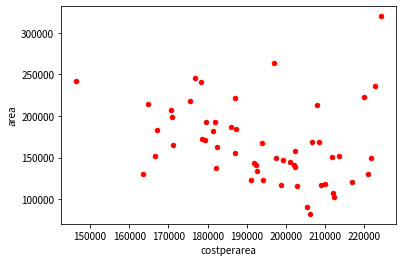

In [89]:
df.plot.scatter(x='costperarea',y='area',c='red')

In [99]:
'''
fig=plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)  
ax1 = fig.add_subplot(111)
ax1.plot(df.area,color='green',label='面積(坪)')
ax1.plot(df.costperarea,color='blue',label='申報成交平均單價(元/坪)')
plt.legend()
'''

"\nfig=plt.figure(figsize=(20,8))\nplt.xticks(rotation = 90)  \nax1 = fig.add_subplot(111)\nax1.plot(df.area,color='green',label='面積(坪)')\nax1.plot(df.costperarea,color='blue',label='申報成交平均單價(元/坪)')\nplt.legend()\n"

In [98]:
#plt.scatter(df.area, df.costperarea, s=50, alpha=.5)

In [177]:
#切分Test集
train = df[:30]
test = df[30:]
#只要open high
train_set_x = train['area']
train_set_y = train['costperarea']
test_set_x = test['area']
test_set_y = test['costperarea']

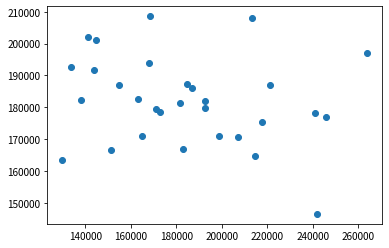

In [178]:
x_train_s= train_set_x.values.reshape(1,-1 )
x_train_s
y_train_s= train_set_y.values.reshape(1,-1 )
y_train_s
plt.scatter(x_train_s, y_train_s)
plt.show()

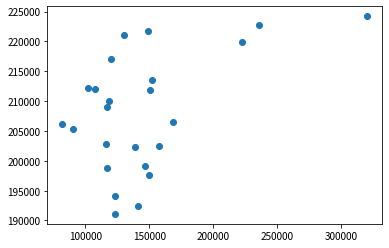

In [179]:
x_test_s= test_set_x.values.reshape(1,-1 )
x_test_s
y_test_s= test_set_y.values.reshape(1,-1 )
y_test_s
plt.scatter(x_test_s, y_test_s)
plt.show()

In [180]:
train.shape

(30, 3)

In [181]:
x_train= train_set_x.values.reshape(-1, 1)
y_train= train_set_y.values.reshape(-1, 1)
x_test= test_set_x.values.reshape(-1, 1)
y_test= test_set_y.values.reshape(-1, 1)

In [182]:
x_train

array([[198916],
       [129915],
       [151213],
       [183151],
       [214491],
       [207175],
       [217480],
       [221124],
       [172821],
       [187045],
       [184679],
       [241128],
       [263737],
       [137977],
       [164898],
       [181813],
       [192698],
       [162995],
       [213353],
       [143972],
       [168275],
       [167888],
       [192408],
       [245943],
       [241660],
       [154897],
       [141323],
       [144885],
       [170975],
       [133717]])

In [183]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [184]:
predict = model.predict(x_train[:200,:])

In [185]:
y_pred = regr.predict(x_test[:200,:])

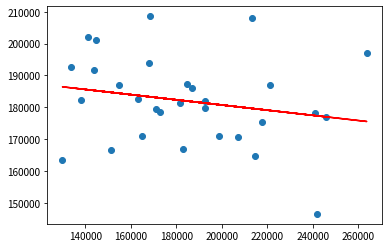

In [187]:
plt.plot(x_train,predict,c="red")
plt.scatter(x_train,y_train)
plt.show()

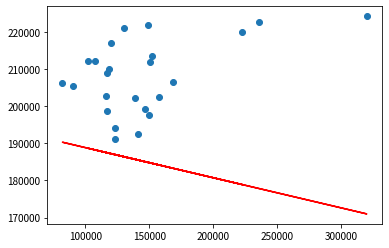

In [188]:
plt.plot(x_test,y_pred,c="red")
plt.scatter(x_test,y_test)
plt.show()